<a href="https://www.kaggle.com/code/abdelrahmanhamdy88/houses-prices-pca?scriptVersionId=140683509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:.2f}'.format


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# Exploring Data 

In [3]:
df.shape

(1460, 81)

Too many Features

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [6]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
nonesColumns=[]
for i in df.columns:
    if df[i].isna().sum()>0:
        print(f"{i} : {df[i].isna().sum()}")
        nonesColumns.append(i)
        

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


we will drop rows if the number of nan values is <60 and drop the column if the number of nan values >300

In [8]:
for i in nonesColumns:
    if df[i].isna().sum()<60:
        df=df.dropna(subset=[i],axis=0)
    elif df[i].isna().sum()>300:
        df=df.drop(columns=i,axis=1)
    else:
        pass

df.shape

(1412, 76)

In [9]:
nonesColumns=[]
for i in df.columns:
    if df[i].isna().sum()>0:
        print(f"{i} : {df[i].isna().sum()}")
        nonesColumns.append(i)
    

LotFrontage : 251
GarageType : 74
GarageYrBlt : 74
GarageFinish : 74
GarageQual : 74
GarageCond : 74


In [10]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=46)

In [11]:
nonesCat=['GarageType','GarageFinish','GarageQual','GarageCond']

for i in nonesCat:
    most_common_value = train[i].value_counts().idxmax()  
    train[i].fillna(most_common_value, inplace=True)
    test[i].fillna(most_common_value, inplace=True)

lotFrontageMedian=train['LotFrontage'].median()
GarageYrBltMedian=train['GarageYrBlt'].median()

train['LotFrontage'].fillna(lotFrontageMedian,inplace=True)
test['LotFrontage'].fillna(lotFrontageMedian,inplace=True)

train['GarageYrBlt'].fillna(GarageYrBltMedian,inplace=True)
test['GarageYrBlt'].fillna(GarageYrBltMedian,inplace=True)




In [12]:
train.isna().sum().sum(),test.isna().sum().sum()

(0, 0)

In [13]:
train.corr()['SalePrice'].apply(abs).sort_values(ascending=False)

/tmp/ipykernel_20/452901628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['SalePrice'].apply(abs).sort_values(ascending=False)


SalePrice       1.00
OverallQual     0.79
GrLivArea       0.73
TotalBsmtSF     0.64
GarageCars      0.64
1stFlrSF        0.63
GarageArea      0.62
FullBath        0.57
TotRmsAbvGrd    0.56
YearBuilt       0.51
YearRemodAdd    0.50
MasVnrArea      0.47
GarageYrBlt     0.46
Fireplaces      0.46
BsmtFinSF1      0.38
LotFrontage     0.37
2ndFlrSF        0.33
WoodDeckSF      0.32
OpenPorchSF     0.31
LotArea         0.27
HalfBath        0.26
BsmtFullBath    0.20
BsmtUnfSF       0.19
BedroomAbvGr    0.18
EnclosedPorch   0.14
PoolArea        0.12
ScreenPorch     0.11
OverallCond     0.09
KitchenAbvGr    0.09
MSSubClass      0.07
Id              0.06
MoSold          0.05
YrSold          0.04
3SsnPorch       0.03
BsmtHalfBath    0.03
LowQualFinSF    0.02
BsmtFinSF2      0.01
MiscVal         0.01
Name: SalePrice, dtype: float64

/tmp/ipykernel_20/4182902458.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='Blues',annot=True)


<Axes: >

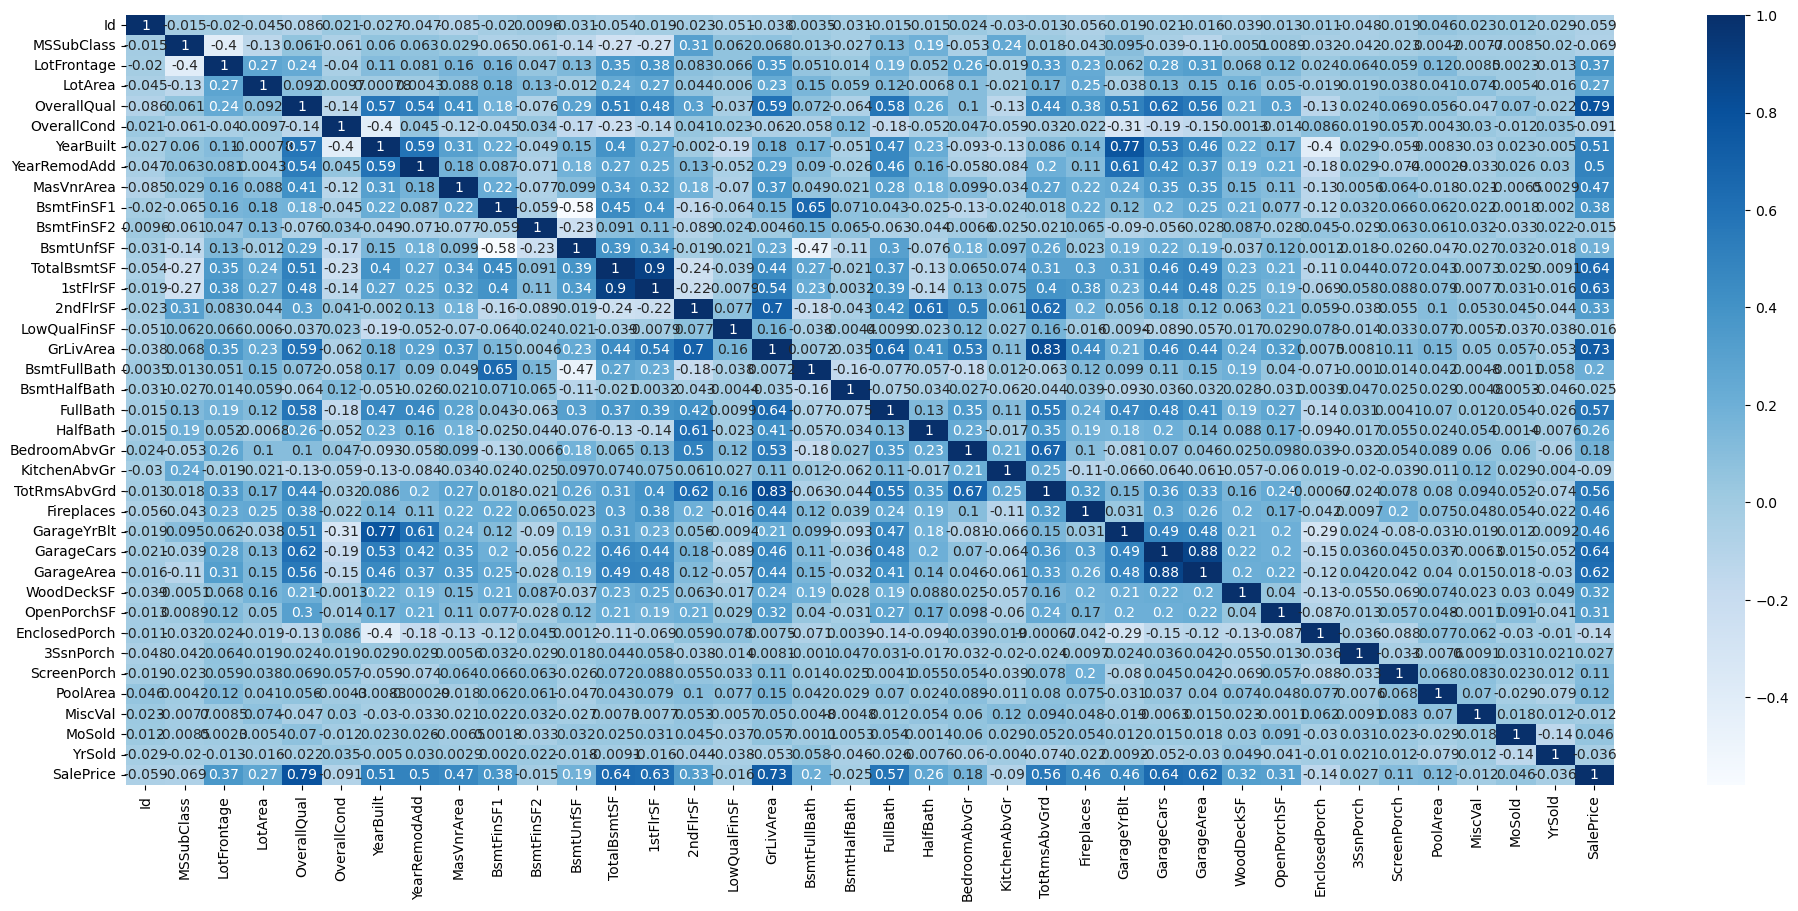

In [14]:
plt.figure(figsize=(24,10))
sns.heatmap(train.corr(),cmap='Blues',annot=True)


In [15]:
train=train.drop(columns='Id',axis=1)
test=test.drop(columns='Id',axis=1)
categorical_cols = list(train.select_dtypes(include=['object']).columns)
numerical_cols  = list(train.select_dtypes(include=['number']).columns)


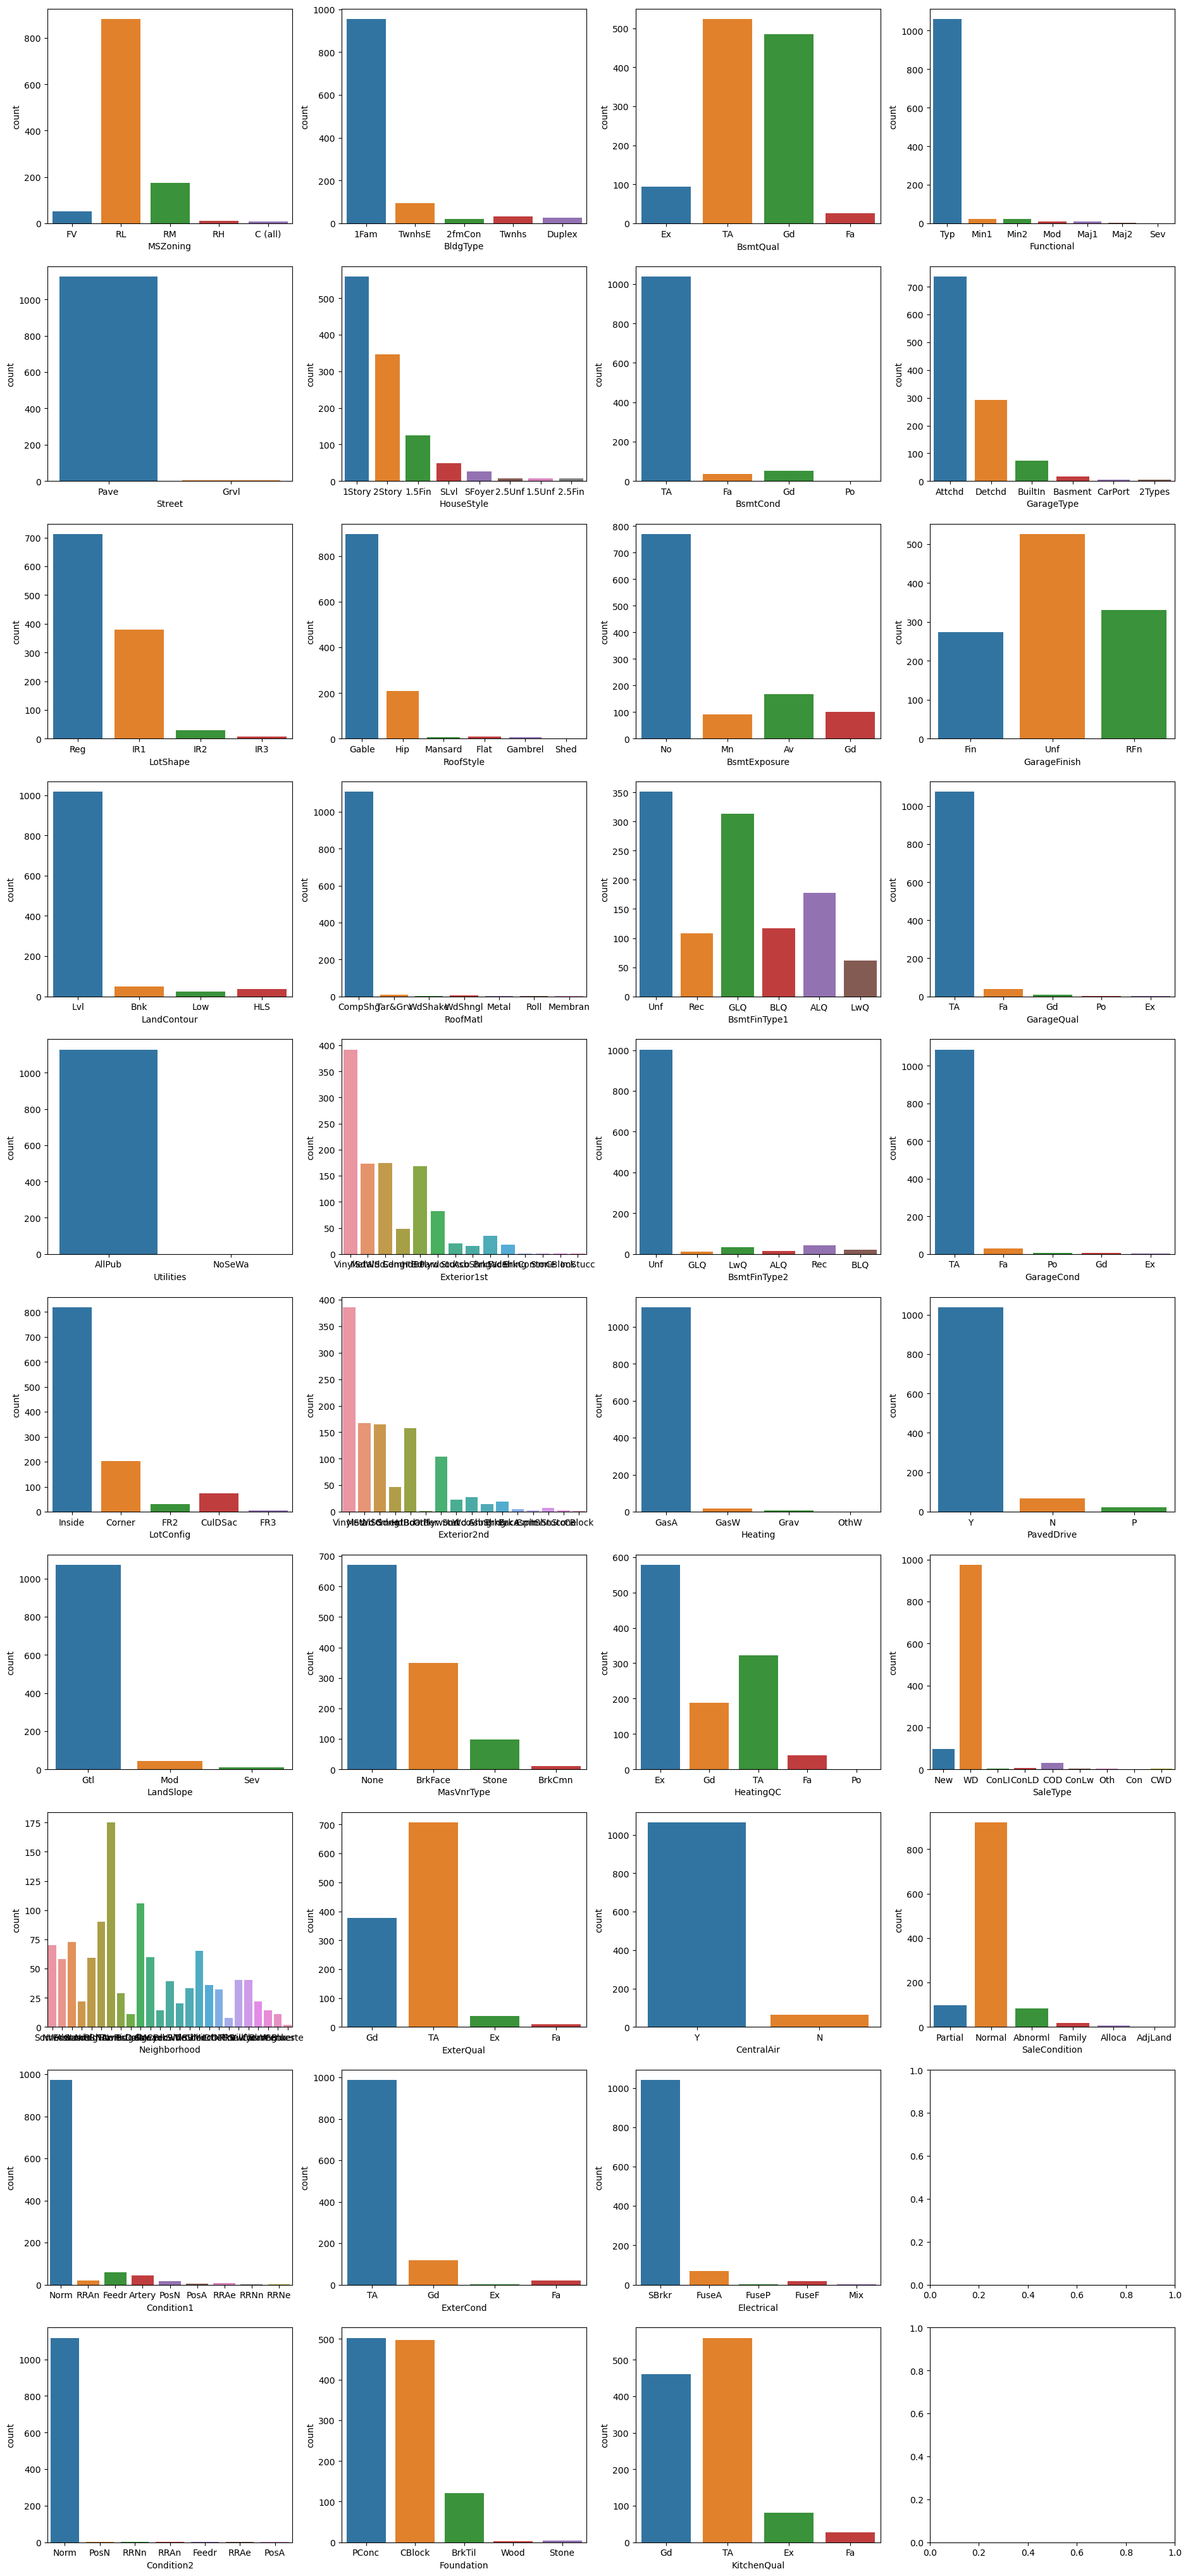

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(10, 4, figsize=(23, 52))
counttt = 0

for i in range(4):
    for j in range(10):
        if counttt >= len(categorical_cols):  # Check if counttt is out of range
            break
        
        sns.countplot(data=train, x=categorical_cols[counttt], ax=ax[j][i])        
        counttt += 1

#plt.tight_layout()
plt.show()


dropping very low variance features , and making some other features 2 values only 

In [17]:




zero_one_columns=['BldgType','BsmtCond','LandContour','BsmtFinType2','GarageQual',
                  'LandSlope','PavedDrive','CentralAir','Condition1','ExterCond','Electrical',
                  'Condition2','Street','RoofMatl','Functional','Utilities','Heating','GarageCond']
for col in zero_one_columns:
    most_frequent_item = train[col].value_counts().idxmax()
    train[col].apply(lambda x: 1 if x == most_frequent_item else 0)
    test[col].apply(lambda x: 1 if x == most_frequent_item else 0)
    


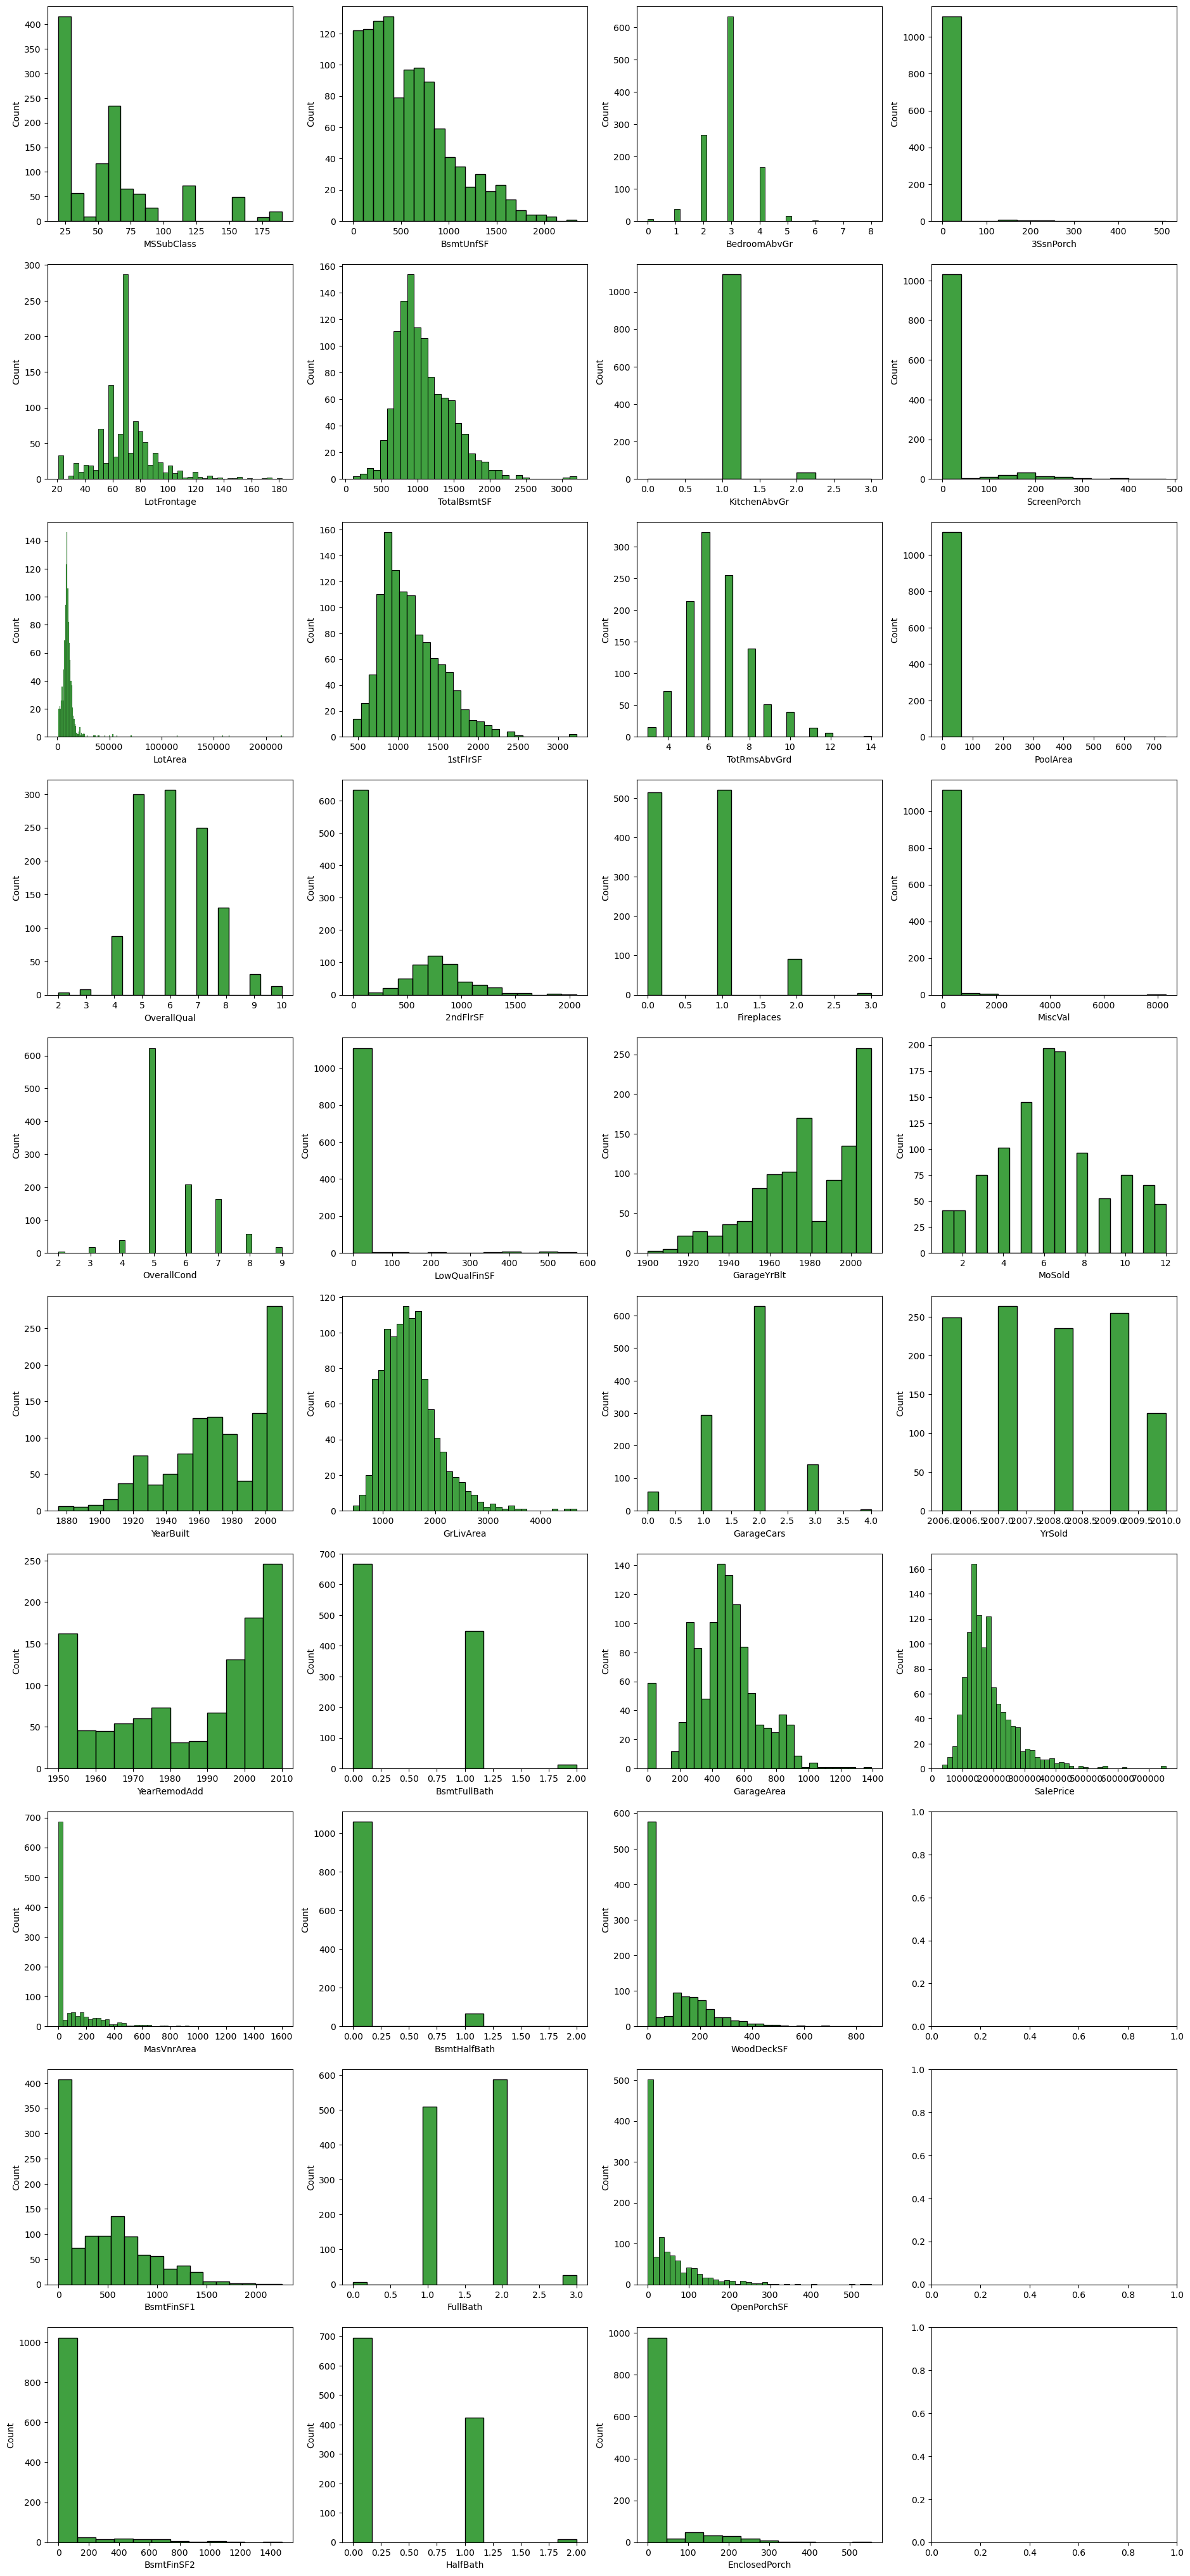

In [18]:
fig, ax = plt.subplots(10, 4, figsize=(23, 52))
counttt = 0

for i in range(4):
    for j in range(10):
        if counttt >= len(numerical_cols):  # Check if counttt is out of range
            break
        
        sns.histplot(data=train, x=numerical_cols[counttt], ax=ax[j][i],color='green')
        #ax[j][i].set_title(categorical_cols[counttt])
        
        
        counttt += 1

#plt.tight_layout()
plt.show()


In [19]:
train.corr()['SalePrice'].apply(abs).sort_values(ascending=False)

/tmp/ipykernel_20/452901628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['SalePrice'].apply(abs).sort_values(ascending=False)


SalePrice       1.00
OverallQual     0.79
GrLivArea       0.73
TotalBsmtSF     0.64
GarageCars      0.64
1stFlrSF        0.63
GarageArea      0.62
FullBath        0.57
TotRmsAbvGrd    0.56
YearBuilt       0.51
YearRemodAdd    0.50
MasVnrArea      0.47
GarageYrBlt     0.46
Fireplaces      0.46
BsmtFinSF1      0.38
LotFrontage     0.37
2ndFlrSF        0.33
WoodDeckSF      0.32
OpenPorchSF     0.31
LotArea         0.27
HalfBath        0.26
BsmtFullBath    0.20
BsmtUnfSF       0.19
BedroomAbvGr    0.18
EnclosedPorch   0.14
PoolArea        0.12
ScreenPorch     0.11
OverallCond     0.09
KitchenAbvGr    0.09
MSSubClass      0.07
MoSold          0.05
YrSold          0.04
3SsnPorch       0.03
BsmtHalfBath    0.03
LowQualFinSF    0.02
BsmtFinSF2      0.01
MiscVal         0.01
Name: SalePrice, dtype: float64

In [20]:
features_to_drop=['3SsnPorch','BsmtHalfBath','LowQualFinSF','PoolArea','MiscVal','KitchenAbvGr','ScreenPorch','BsmtFinSF2','EnclosedPorch']

for col in features_to_drop:
    train=train.drop(columns=col,axis=1)
    test=test.drop(columns=col,axis=1)
    


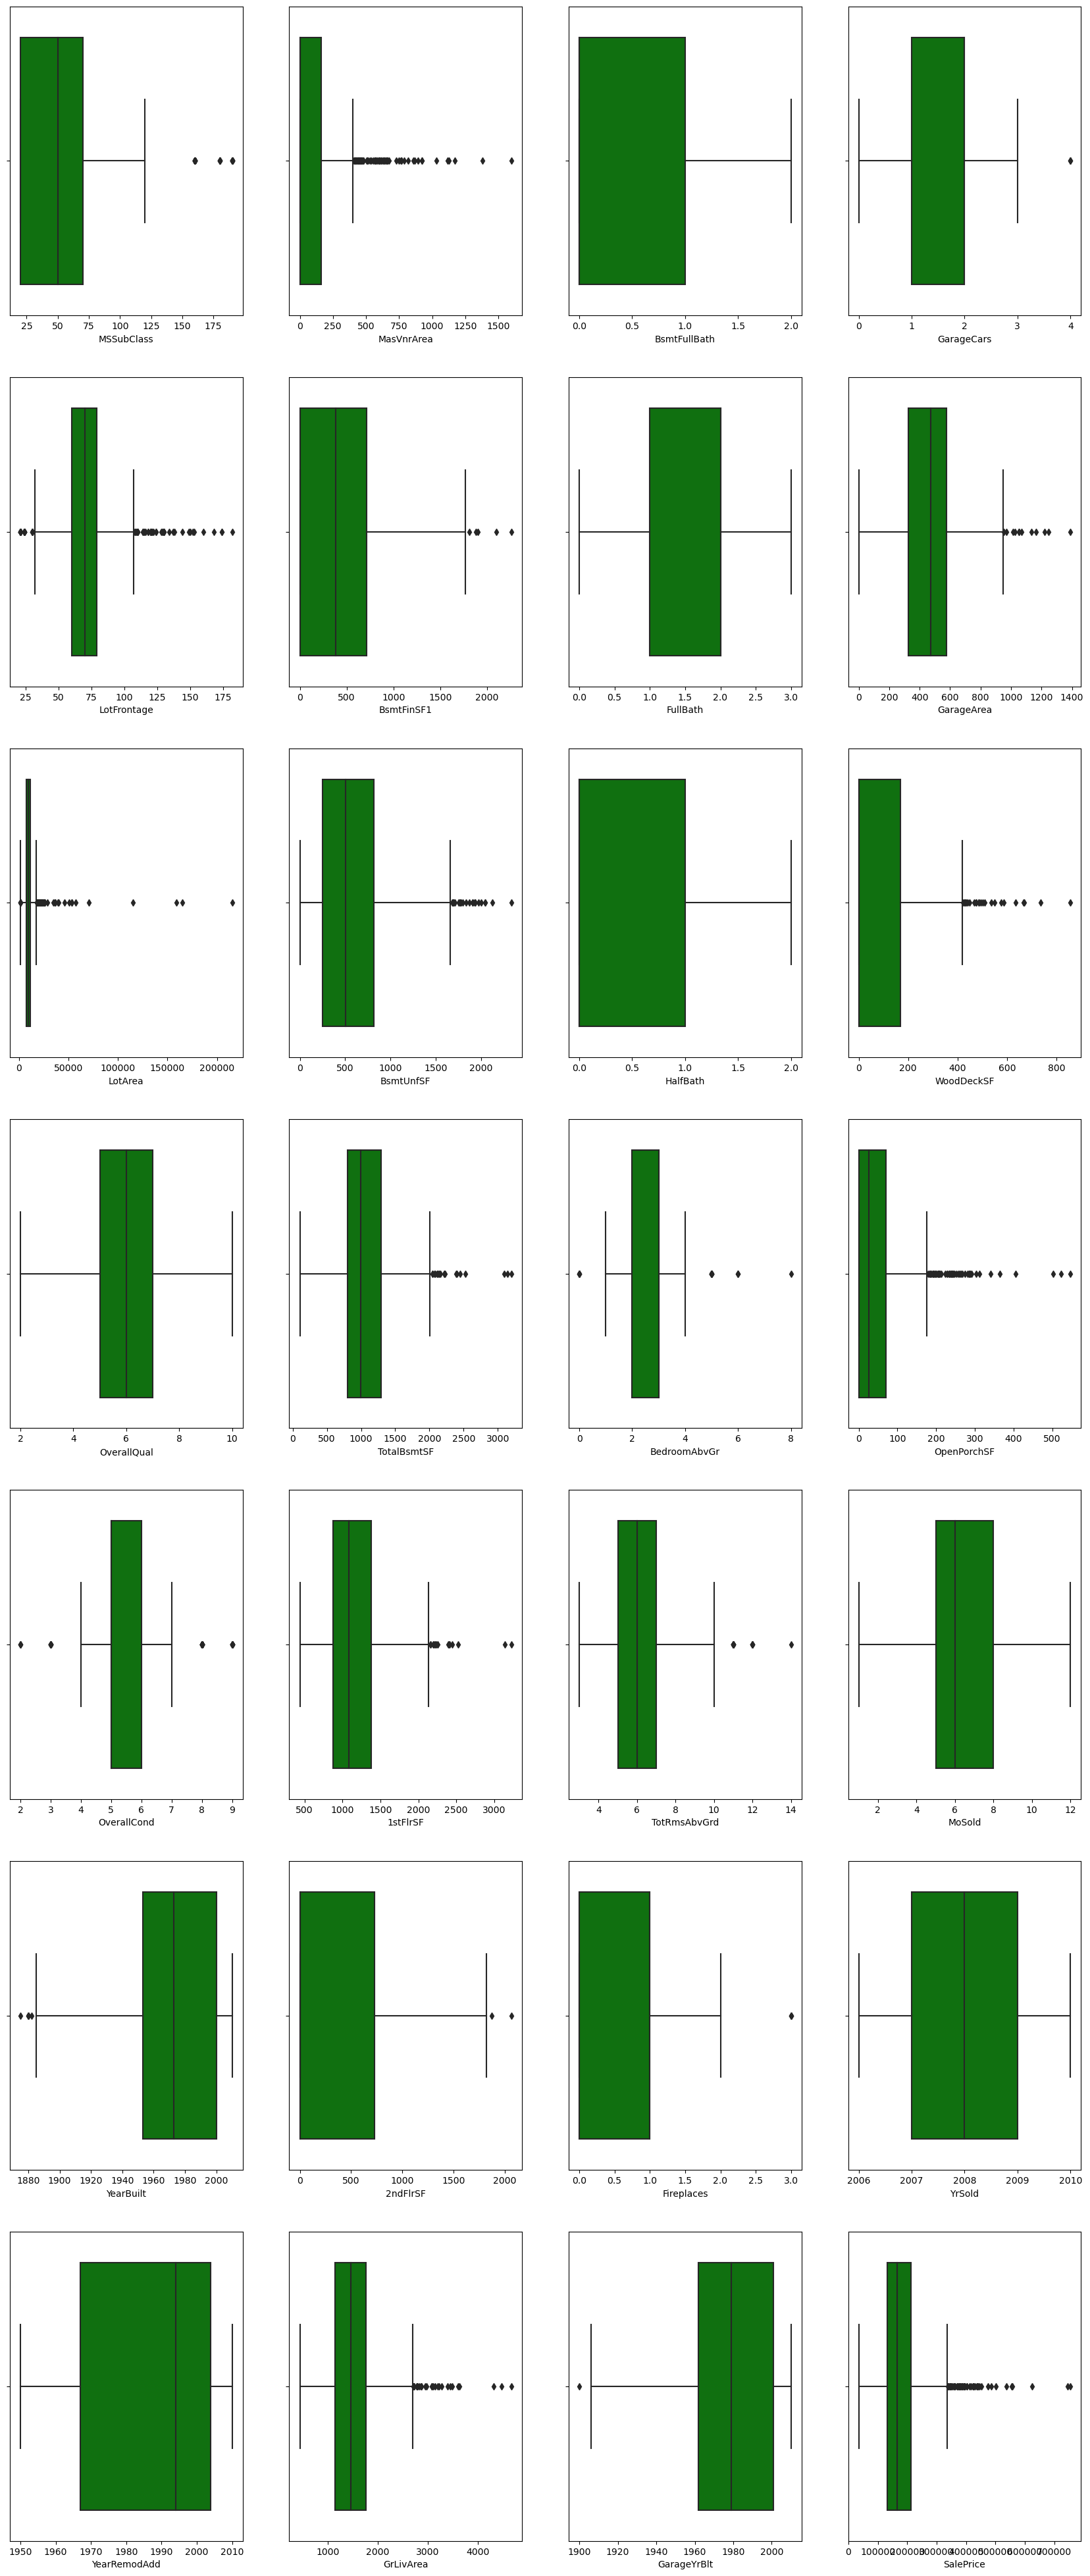

In [21]:
categorical_cols = list(train.select_dtypes(include=['object']).columns)
numerical_cols  = list(train.select_dtypes(include=['number']).columns)



fig, ax = plt.subplots(7,4 , figsize=(21, 50))
counttt = 0

for i in range(4):
    for j in range(7):
        
        sns.boxplot(data=train, x=numerical_cols[counttt], ax=ax[j][i],color='green')
        #ax[j][i].set_title(categorical_cols[counttt])
        counttt+=1
        
        

#plt.tight_layout()
plt.show()


removing outliers


In [22]:
mask=(train['GrLivArea']<4000)&(train['GarageYrBlt']>1910)&(train['Fireplaces']<2.5)&(train['LotArea']<100000)&(train['MSSubClass']<150)&(train['MasVnrArea']<1250)& (train['1stFlrSF']<3000)
train=train[mask]

<Axes: xlabel='SalePrice'>

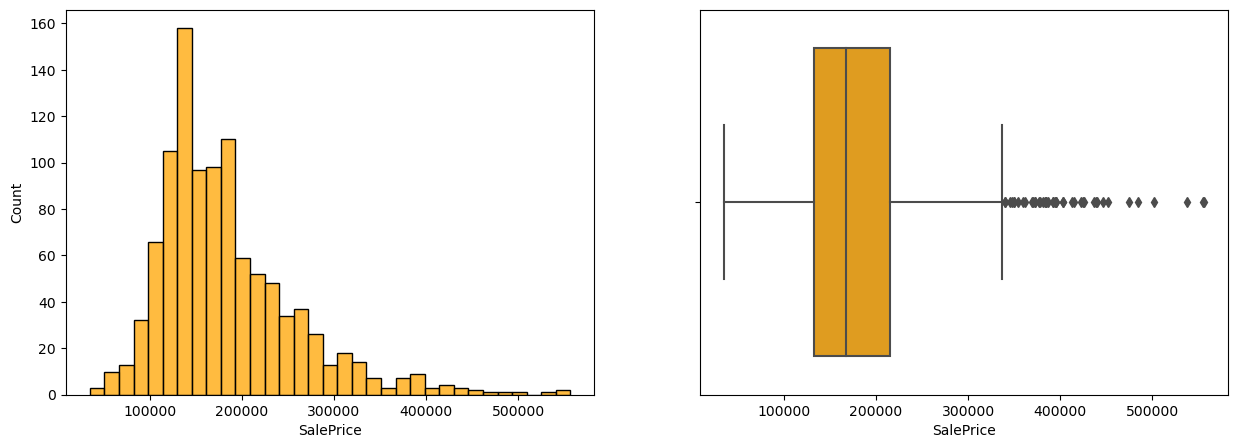

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train,x='SalePrice',ax=ax[0],color='orange')
sns.boxplot(train,x='SalePrice',ax=ax[1],color='orange')

In [24]:
train=train[train['SalePrice']<500000]

In [25]:
train.shape

(1033, 66)

# Splitting Data and Choosing Model

In [26]:
train_X=train.drop(columns='SalePrice')
train_y=train['SalePrice']
test_X=test.drop(columns='SalePrice')
test_y=test['SalePrice']
categorical_cols = list(train_X.select_dtypes(include=['object']).columns)
numerical_cols  = list(train_X.select_dtypes(include=['number']).columns)


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder

full_pipeline = ColumnTransformer([ ("num", StandardScaler(), numerical_cols),
                                    ("cat", BinaryEncoder(cols=categorical_cols),categorical_cols),
                                  ])

In [28]:
train_X=full_pipeline.fit_transform(train_X)
test_X=full_pipeline.transform(test_X)

In [29]:
train_X.shape

(1033, 143)

# Applying PCA 

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9)
pca.fit(train_X)
print(f"we have {pca.n_components_} to get 0.9 variance")

train_X_pca=pca.transform(train_X)
test_X_pca=pca.transform(test_X)

we have 40 to get 0.9 variance


In [31]:
from sklearn.model_selection import GridSearchCV
def tuneAndGetBestModel(model,param):
    print("WITH PCA\n\n")
    grid=GridSearchCV(model,param,cv=4,scoring='r2')
    grid.fit(train_X_pca,train_y)
    print(f"train accuracy={grid.score(train_X_pca,train_y)}")
    print(f"Mean Cross Validated score of the best model is {grid.best_score_} ")
    print(f"test accuracy={grid.score(test_X_pca,test_y)}")
    print(grid.best_params_)
    print("***************************")
    print("WITHOUT PCA\n\n")
    grid.fit(train_X,train_y)
    print(f"train accuracy={grid.score(train_X,train_y)}")
    print(f"Mean Cross Validated score of the best model is {grid.best_score_} ")
    print(f"test accuracy={grid.score(test_X,test_y)}")
    print(grid.best_params_)
    print("***************************")

    return grid.best_estimator_

    


# Choosing Best Models

# 1-Regression

In [32]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression,Ridge
#from sklearn.pipeline import Pipeline

#reg= Pipeline([
#   ('poly_features', PolynomialFeatures(degree=2)),
#   ('Ridge', Ridge())
#])

#param_grid = {'poly_features__degree':[1,2,3],'Ridge__alpha':[1,10,100]}
#reg=tuneAndGetBestModel(reg,param_grid)




# 2- SVR 

In [33]:
from sklearn.svm import SVR

param_grid = {
    'C':[0.1,1,10,100,1000],
    'degree':[2,3,4,5],
    'kernel':['rbf','linear','poly']
    
}

svr=SVR()
svr=tuneAndGetBestModel(svr,param_grid)


WITH PCA


train accuracy=0.8832782136291102
Mean Cross Validated score of the best model is 0.8735584427585581 
test accuracy=0.6553716228039466
{'C': 1000, 'degree': 2, 'kernel': 'linear'}
***************************
WITHOUT PCA


train accuracy=0.9107841895803244
Mean Cross Validated score of the best model is 0.8916163160707241 
test accuracy=0.6640310780420287
{'C': 1000, 'degree': 2, 'kernel': 'linear'}
***************************


# 3-Decision Tree 

In [34]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_depth': np.arange(1,30,2),  
    'min_samples_split': np.arange(2,15)
}
tree=DecisionTreeRegressor()
tree=tuneAndGetBestModel(tree,param_grid)


WITH PCA


train accuracy=0.9370038298176349
Mean Cross Validated score of the best model is 0.7926772464141636 
test accuracy=0.7839078615282902
{'max_depth': 7, 'min_samples_split': 13}
***************************
WITHOUT PCA


train accuracy=0.8753556037794299
Mean Cross Validated score of the best model is 0.7863729639848476 
test accuracy=0.7213669601314401
{'max_depth': 5, 'min_samples_split': 4}
***************************


# 4-RandomForest

In [35]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [i*10 for i in range(1,8)],
    'max_depth': [3,7,9,11,15],  
    'min_samples_split': [2,4,5,6,10],  
}
rf= RandomForestRegressor()
rf=tuneAndGetBestModel(rf,param_grid)


WITH PCA


train accuracy=0.9707776262477852
Mean Cross Validated score of the best model is 0.8691610451433591 
test accuracy=0.8214425029097692
{'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 60}
***************************
WITHOUT PCA


train accuracy=0.9792523531653821
Mean Cross Validated score of the best model is 0.8768173807505821 
test accuracy=0.8189386613833015
{'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 60}
***************************


# 5- XGBoost

In [36]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [25,50, 75,100],
    'max_depth': [3,5,8,10,12],
}

xgb=XGBRegressor()
xgb=tuneAndGetBestModel(xgb,param_grid)



WITH PCA


train accuracy=0.9920488584896915
Mean Cross Validated score of the best model is 0.8758436529658196 
test accuracy=0.831750313368754
{'max_depth': 3, 'n_estimators': 100}
***************************
WITHOUT PCA


train accuracy=0.9855151005430168
Mean Cross Validated score of the best model is 0.8951114907681987 
test accuracy=0.8541490520418262
{'max_depth': 3, 'n_estimators': 100}
***************************
